**Iris Dataset**

****1. Import, Clean & Validate****

The *Iris* dataset is imported, cleaned and validated to make sure it is ready for analysis. 

**1.1 Import Dependencies**

In [0]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="pastel")

**1.2 Import Data**

In [0]:
# Download data
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
url_names = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names'

s_data = requests.get(url_data).content
s_names = requests.get(url_names).content

# Read data into dataframe
iris = pd.read_csv(io.StringIO(s_data.decode('utf=8')), header=None)

# Show raw data
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**1.3 Cleaning Data**

**1.3.1** **Assign Labels**

In [0]:
iris.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'species']

**1.3.2** **Overview of data**

In [0]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     150 non-null float64
species            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**1.3.3 Missing Values & Duplicate Rows**

**1.3.3.1 Missing Values**

There are no missing values:

In [0]:
print("Missing Values: ")
print(iris.isnull().sum())

Missing Values: 
sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64


**1.3.3.2 Duplicate Rows**

There is one row with two total duplicates, and one more row with three total duplicates:

In [0]:
dupes = iris.duplicated(keep=False) == True
iris[dupes]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


Note: If these duplicates are removed, it will mean that there are no longer an equal number of samples representing each species, so they should be kept in.

Overview after cleaning:

In [0]:

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     150 non-null float64
species            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**1.3.4** **Categorical Variables**

**1.3.4.1**  ***species***

*species* is the only categorical variable. How many unique factors does it have?

In [0]:
print(iris['species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Delete text 'Iris-' from species column

In [0]:
iris['species'] = iris.species.str.replace('Iris-', '')
print(iris.species.unique())

['setosa' 'versicolor' 'virginica']


**1.3.5** **Numeric Variables**

The numeric values *sepal_length_cm,	sepal_width_cm,	petal_length_cm,	petal_width_cm* show no issues with extreme outliers, 

In [0]:
# Describe numeric variables
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**2. Exploratory Data Analysis (EDA)**

**2.1 EDA of Categorical Variables**

**2.1.1** ***species***

The *species* variable is split across three unique factors with an equal number of observations.

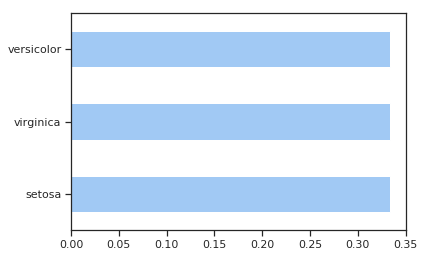

setosa        0.333333
virginica     0.333333
versicolor    0.333333
Name: species, dtype: float64


In [0]:
species = iris['species'].value_counts(normalize=True).sort_values()
species.plot(kind='barh')
plt.show()
print(species)

**2.2 EDA of Numeric Variables**

List numeric variables:

In [0]:
list(iris.select_dtypes(include=[np.number]).columns)

['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']

**2.2.1** ***Violin plots: 'sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'***

In addition to the mean, median and outliers that a boxplot shows, violin plots include kernal density to give an idea of the distribution. The plots in the figure use the same y-axis so that the ratios of petal and sepal lengths and widths can be easily compared.

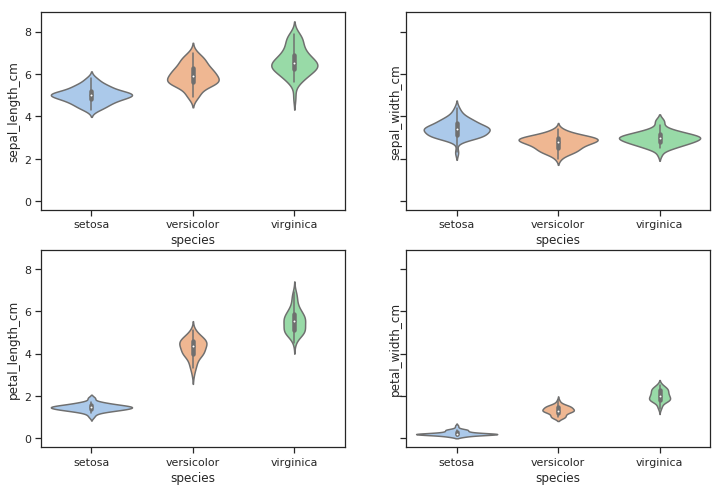

In [0]:
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(12, 8))

sns.violinplot(x='species', y='sepal_length_cm', data=iris, ax=ax[0,0])
sns.violinplot(x='species', y='sepal_width_cm', data=iris, ax=ax[0,1])
sns.violinplot(x='species', y='petal_length_cm', data=iris, ax=ax[1,0])
sns.violinplot(x='species', y='petal_width_cm', data=iris, ax=ax[1,1])

plt.show()

**2.2.2 Pairplots**

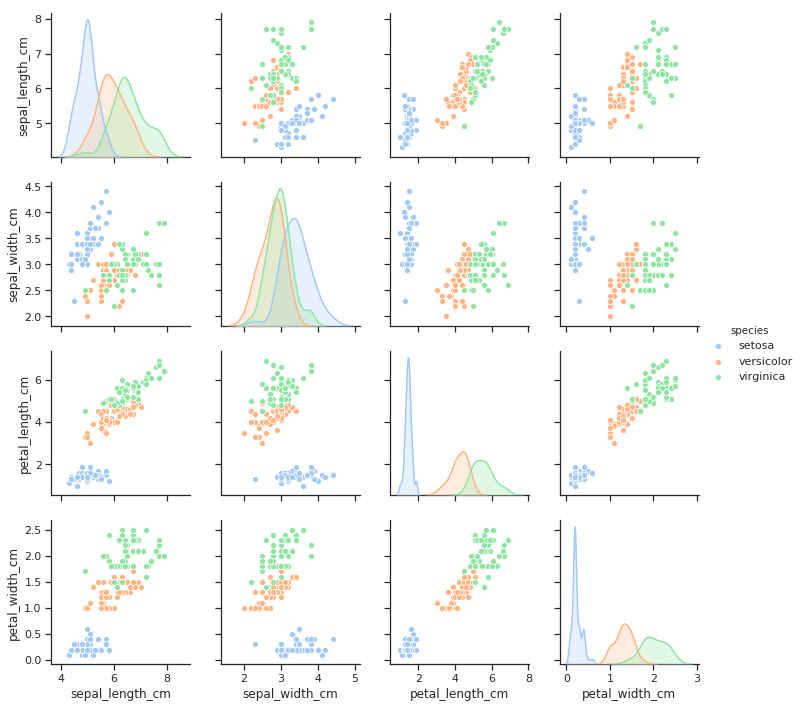

In [0]:
sns.pairplot(iris, hue='species')
plt.show()

**2.2.2 Correlation Matrix**

Comparing correlation matrices can give insight to the physiological differences between species.

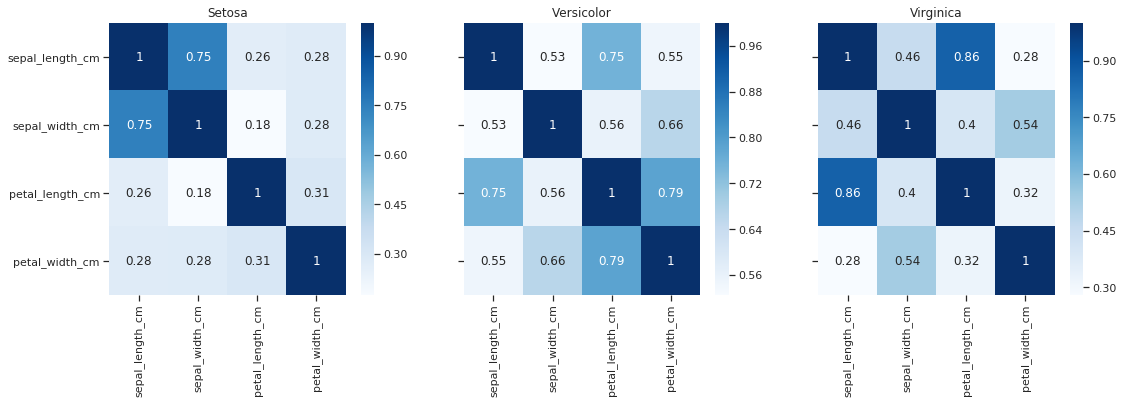

In [0]:
# Mask by species
setosa = iris['species'] == 'setosa'
versicolor = iris['species'] == 'versicolor'
virginica = iris['species'] == 'virginica'


fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.heatmap(iris[setosa].corr(),annot=True, ax=ax[0], cmap="Blues")
ax[0].title.set_text('Setosa')

sns.heatmap(iris[versicolor].corr(),annot=True, ax=ax[1], cmap="Blues")
ax[1].title.set_text('Versicolor')

sns.heatmap(iris[virginica].corr(),annot=True, ax=ax[2], cmap="Blues")
ax[2].title.set_text('Virginica')

#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)



**3. Predictive Modeling**

**3.1 Import Machine Learning Dependencies**

In [0]:
# import keras for neural network
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# import sci-kit learn tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

**3.2 KNN Classifier**

In [0]:
# separate data from labels
X = iris.iloc[:,:-1].values
y = iris.iloc[:,-1].replace({"setosa":0, "versicolor":1, "virginica": 2}).values
y_cat = to_categorical(y)

knn1 = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

cross_val_score(knn1, X_train, y_train, cv=5)

array([0.95833333, 0.95833333, 0.875     , 0.95833333, 0.95833333])

In [0]:
select_params = {"n_neighbors": range(1, 11),
                 "weights": ["uniform", "distance"],
                 "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"]}

knn2 = KNeighborsClassifier()

grid_knn2 = GridSearchCV(knn2, select_params, cv=10)

grid_knn2.fit(X_train, y_train)

grid_knn2.best_params_

{'metric': 'chebyshev', 'n_neighbors': 5, 'weights': 'uniform'}

In [0]:
grid_knn2.best_score_

0.975

**3.3 K-means Clustering**

In [0]:
clusters = KMeans(n_clusters=3)

labels = clusters.fit_predict(X)

df = pd.DataFrame({'labels':labels, 'species':iris['species']})

ct = pd.crosstab(df['labels'], df['species'])

print(ct)


species  setosa  versicolor  virginica
labels                                
0             0          48         14
1            50           0          0
2             0           2         36


**3.4 Neural Network**

In [0]:
nn = Sequential()

nn.add(Dense(100, activation='relu', input_dim=4))

nn.add(Dense(3, activation='softmax'))

nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=3)

nn_model = nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10, callbacks=[early_stopping_monitor])


Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 1s 10ms/step - loss: 1.2263 - acc: 0.2833 - val_loss: 1.0444 - val_acc: 0.3667
Epoch 2/500
120/120 [==============================] - 0s 197us/step - loss: 1.0148 - acc: 0.4333 - val_loss: 0.9220 - val_acc: 0.7000
Epoch 3/500
120/120 [==============================] - 0s 172us/step - loss: 0.8935 - acc: 0.7250 - val_loss: 0.8264 - val_acc: 0.8333
Epoch 4/500
120/120 [==============================] - 0s 178us/step - loss: 0.7959 - acc: 0.7083 - val_loss: 0.7425 - val_acc: 0.7000
Epoch 5/500
120/120 [==============================] - 0s 181us/step - loss: 0.7260 - acc: 0.7917 - val_loss: 0.6751 - val_acc: 0.7000
Epoch 6/500
120/120 [==============================] - 0s 178us/step - loss: 0.6611 - acc: 0.7833 - val_loss: 0.6220 - val_acc: 0.8000
Epoch 7/500
120/120 [==============================] - 0s 185us/step - loss: 0.6117 - acc: 0.8667 - val_loss: 0.5801 - val_acc: 0.8333
Epoch 8/500

**3.4.1 Visualizing Loss & Accuracy**

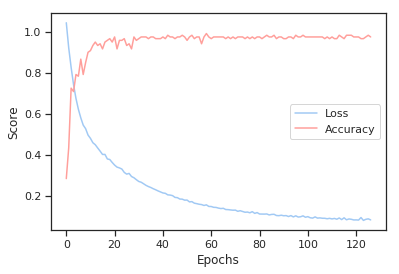

In [0]:
plt.plot(nn_model.history['val_loss'], 'b', label='Loss')
plt.plot(nn_model.history['acc'], 'r', label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend(loc='center right')
plt.show()